In [0]:
import pandas as pd
import numpy as np
from PIL import Image
from sklearn import preprocessing
import glob
import os
from sklearn.model_selection import train_test_split

In [63]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Extracting pixel features

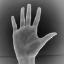

In [64]:
Im = Image.open("/content/drive/My Drive/Colab Notebooks/CMPE258/project/train.zip (Unzipped Files)/train/1.jpg", 'r')
Im

In [65]:
imData1 = list(Im.getdata())
len(imData1)

4096

In [0]:
def showPic(filename):
    return Image.open('/content/drive/My Drive/Colab Notebooks/CMPE258/project/train.zip (Unzipped Files)/train/'+filename+'.jpg', 'r')
    

In [0]:
def getPixel(filename):
    im = Image.open(filename, 'r')
    imData = list(im.getdata())
    imData = np.array(imData).reshape((64,64,1))
    return imData

##### Convert to numpy array

In [68]:
imData1 = np.array(imData1).reshape((64,64))
imData1

array([[142, 138, 132, ..., 153, 155, 157],
       [139, 134, 129, ..., 150, 153, 155],
       [134, 130, 124, ..., 147, 150, 153],
       ...,
       [119, 116, 112, ..., 130, 134, 137],
       [123, 120, 115, ..., 132, 136, 139],
       [125, 122, 117, ..., 133, 137, 140]])

### Obtain 1-hot labels

In [69]:
Label = pd.read_csv('/content/drive/My Drive/Colab Notebooks/CMPE258/project/train.csv')
Label.drop(columns = ['filename'])
lb = preprocessing.LabelBinarizer()
lb.fit(Label['label'])

lb.transform([Label['label'][0]])

array([[0, 0, 0, 0, 0, 1, 0, 0, 0, 0]])

In [0]:
Label = Label.drop(columns=['filename', 'id'])

In [71]:
Label.iloc[0][0]

5

In [72]:
Label.shape

(1500, 1)

In [0]:
def convert21H(filename, df, hdlr):
    num = Label.iloc[int(filename)-1]
    oneH = hdlr.transform(num)
    
    return oneH.tolist()[0]
        

In [74]:
convert21H('1', Label, lb)

[0, 0, 0, 0, 0, 1, 0, 0, 0, 0]

### Make a list of training and test files.

In [75]:
trainFileNames = glob.glob('/content/drive/My Drive/Colab Notebooks/CMPE258/project/train.zip (Unzipped Files)/train/*jpg')
#trainFileNames = [os.path.basename(x) for x in glob.glob('train/*jpg')]
trainFileNames

['/content/drive/My Drive/Colab Notebooks/CMPE258/project/train.zip (Unzipped Files)/train/1448.jpg',
 '/content/drive/My Drive/Colab Notebooks/CMPE258/project/train.zip (Unzipped Files)/train/145.jpg',
 '/content/drive/My Drive/Colab Notebooks/CMPE258/project/train.zip (Unzipped Files)/train/1450.jpg',
 '/content/drive/My Drive/Colab Notebooks/CMPE258/project/train.zip (Unzipped Files)/train/1451.jpg',
 '/content/drive/My Drive/Colab Notebooks/CMPE258/project/train.zip (Unzipped Files)/train/1452.jpg',
 '/content/drive/My Drive/Colab Notebooks/CMPE258/project/train.zip (Unzipped Files)/train/1453.jpg',
 '/content/drive/My Drive/Colab Notebooks/CMPE258/project/train.zip (Unzipped Files)/train/1454.jpg',
 '/content/drive/My Drive/Colab Notebooks/CMPE258/project/train.zip (Unzipped Files)/train/1455.jpg',
 '/content/drive/My Drive/Colab Notebooks/CMPE258/project/train.zip (Unzipped Files)/train/1456.jpg',
 '/content/drive/My Drive/Colab Notebooks/CMPE258/project/train.zip (Unzipped Files

In [76]:
len('/content/drive/My Drive/Colab Notebooks/CMPE258/project/train.zip (Unzipped Files)/train')

88

In [77]:
X_train = []
Y_train = []
for i, filename in enumerate(trainFileNames):
    print('\n---', filename, '--- [',i,']')
    img = getPixel(filename)
    X_train.append(img)
    oH = convert21H(filename[89:-4], Label, lb)
    Y_train.append(oH)
    print(oH)


--- /content/drive/My Drive/Colab Notebooks/CMPE258/project/train.zip (Unzipped Files)/train/1448.jpg --- [ 0 ]
[0, 1, 0, 0, 0, 0, 0, 0, 0, 0]

--- /content/drive/My Drive/Colab Notebooks/CMPE258/project/train.zip (Unzipped Files)/train/145.jpg --- [ 1 ]
[0, 0, 0, 0, 0, 0, 1, 0, 0, 0]

--- /content/drive/My Drive/Colab Notebooks/CMPE258/project/train.zip (Unzipped Files)/train/1450.jpg --- [ 2 ]
[0, 0, 1, 0, 0, 0, 0, 0, 0, 0]

--- /content/drive/My Drive/Colab Notebooks/CMPE258/project/train.zip (Unzipped Files)/train/1451.jpg --- [ 3 ]
[0, 0, 0, 0, 1, 0, 0, 0, 0, 0]

--- /content/drive/My Drive/Colab Notebooks/CMPE258/project/train.zip (Unzipped Files)/train/1452.jpg --- [ 4 ]
[0, 0, 0, 1, 0, 0, 0, 0, 0, 0]

--- /content/drive/My Drive/Colab Notebooks/CMPE258/project/train.zip (Unzipped Files)/train/1453.jpg --- [ 5 ]
[0, 1, 0, 0, 0, 0, 0, 0, 0, 0]

--- /content/drive/My Drive/Colab Notebooks/CMPE258/project/train.zip (Unzipped Files)/train/1454.jpg --- [ 6 ]
[0, 0, 0, 0, 0, 0, 0, 0,

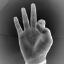

In [78]:
Image.fromarray(np.uint8(X_train[1499][:,:,0]))

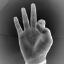

In [79]:
showPic('1449')

In [0]:
X_train = np.array(X_train)
Y_train = np.array(Y_train)


In [0]:
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size= 0.2)

In [0]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.optimizers import RMSprop, Adam, Adagrad, Adamax, SGD

In [0]:

model = Sequential()

model.add(Conv2D(filters = 128, kernel_size = (5,5),padding = 'Same', activation ='relu', input_shape = (64,64,1)))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters = 128, kernel_size = (5,5),padding = 'Same', activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.20))

model.add(Conv2D(filters = 256, kernel_size = (5,5),padding = 'Same', activation ='relu', input_shape = (64,64,1)))
model.add(Conv2D(filters = 256, kernel_size = (3,3),padding = 'Same', activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.20))


model.add(Flatten())
model.add(Dense(256, activation = "relu"))
model.add(Dropout(0.4))
model.add(Dense(10, activation = "softmax"))

In [84]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_13 (Conv2D)           (None, 64, 64, 128)       3328      
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 32, 32, 128)       0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 32, 32, 128)       409728    
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 16, 16, 128)       0         
_________________________________________________________________
dropout_10 (Dropout)         (None, 16, 16, 128)       0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 16, 16, 256)       819456    
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 16, 16, 256)      

In [0]:

optimizer = Adam(lr=0.005)

In [0]:
model.compile(optimizer = optimizer , loss = "categorical_crossentropy", metrics=["accuracy"])

In [89]:
results = model.fit(X_train, Y_train, 
                    batch_size = 16, 
                    epochs = 20, 
                    validation_data = (X_val, Y_val),
                    verbose = 1)

Train on 1200 samples, validate on 300 samples
Epoch 1/20
1200/1200 [==============================] - 129s 108ms/step - loss: 2.1002 - accuracy: 0.2408 - val_loss: 1.5704 - val_accuracy: 0.4067
Epoch 2/20
1200/1200 [==============================] - 130s 108ms/step - loss: 1.4526 - accuracy: 0.5058 - val_loss: 0.8393 - val_accuracy: 0.7267
Epoch 3/20
1200/1200 [==============================] - 129s 107ms/step - loss: 1.1427 - accuracy: 0.6000 - val_loss: 1.0659 - val_accuracy: 0.6333
Epoch 4/20
1200/1200 [==============================] - 129s 107ms/step - loss: 1.1121 - accuracy: 0.6417 - val_loss: 0.7556 - val_accuracy: 0.7567
Epoch 5/20
1200/1200 [==============================] - 129s 107ms/step - loss: 1.0141 - accuracy: 0.6592 - val_loss: 0.5867 - val_accuracy: 0.8033
Epoch 6/20
1200/1200 [==============================] - 128s 107ms/step - loss: 0.8290 - accuracy: 0.7317 - val_loss: 0.6536 - val_accuracy: 0.7733
Epoch 7/20
1200/1200 [==============================] - 129s 107m